# Preprocessing

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Import Neccessary libraries
import numpy as np
import pandas as pd

# Import Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Import Model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
import pandas as pd

df = pd.read_csv("CO2 Emissions_Canada.csv")
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
df.describe(include='all')

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385,7385,7385,7385.000000,7385.000000,7385,7385,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
unique,42,2053,16,NaN,NaN,27,5,NaN,NaN,NaN,NaN,NaN
top,FORD,F-150 FFV 4X4,SUV - SMALL,NaN,NaN,AS6,X,NaN,NaN,NaN,NaN,NaN
freq,628,32,1217,NaN,NaN,1324,3637,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,3.160068,5.615030,NaN,NaN,12.556534,9.041706,10.975071,27.481652,250.584699
std,NaN,NaN,NaN,1.354170,1.828307,NaN,NaN,3.500274,2.224456,2.892506,7.231879,58.512679
min,NaN,NaN,NaN,0.900000,3.000000,NaN,NaN,4.200000,4.000000,4.100000,11.000000,96.000000
25%,NaN,NaN,NaN,2.000000,4.000000,NaN,NaN,10.100000,7.500000,8.900000,22.000000,208.000000
50%,NaN,NaN,NaN,3.000000,6.000000,NaN,NaN,12.100000,8.700000,10.600000,27.000000,246.000000
75%,NaN,NaN,NaN,3.700000,6.000000,NaN,NaN,14.600000,10.200000,12.600000,32.000000,288.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [ ]:
df.duplicated().sum()

1103

In [ ]:
df.shape

(7385, 12)

In [ ]:
data = df.copy()

In [ ]:
data.drop_duplicates(inplace=True)
print(f'without duplicates:{data.shape}')


without duplicates:(6282, 12)


In [ ]:
car_make_country_mapping = {
    'ACURA': 'Japan', 'ALFA ROMEO': 'Italy', 'ASTON MARTIN': 'United Kingdom', 'AUDI': 'Germany', 'BENTLEY': 'United Kingdom', 'BMW': 'Germany',
    'BUICK': 'United States', 'CADILLAC': 'United States', 'CHEVROLET': 'United States', 'CHRYSLER': 'United States', 'DODGE': 'United States', 'FIAT': 'Italy',
    'FORD': 'United States', 'GMC': 'United States', 'HONDA': 'Japan', 'HYUNDAI': 'South Korea', 'INFINITI': 'Japan', 'JAGUAR': 'United Kingdom', 'JEEP': 'United States',
    'KIA': 'South Korea', 'LAMBORGHINI': 'Italy', 'LAND ROVER': 'United Kingdom', 'LEXUS': 'Japan', 'LINCOLN': 'United States', 'MASERATI': 'Italy',
    'MAZDA': 'Japan', 'MERCEDES-BENZ': 'Germany', 'MINI': 'United Kingdom', 'MITSUBISHI': 'Japan', 'NISSAN': 'Japan', 'PORSCHE': 'Germany', 'RAM': 'United States',
    'ROLLS-ROYCE': 'United Kingdom', 'SCION': 'Japan', 'SMART': 'Germany', 'SRT': 'United States', 'SUBARU': 'Japan', 'TOYOTA': 'Japan', 'VOLKSWAGEN': 'Germany',
    'VOLVO': 'Sweden', 'GENESIS': 'South Korea', 'BUGATTI': 'France'
}

def get_make_country(car_make):
    return car_make_country_mapping.get(car_make, 'Unknown')

data['make_country'] = data['Make'].apply(get_make_country)

data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),make_country
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196,Japan
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221,Japan
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136,Japan
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,Japan
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244,Japan


In [ ]:
data.describe(include='all')

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),make_country
count,6282,6282,6282,6282.000000,6282.000000,6282,6282,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282
unique,42,2053,16,NaN,NaN,27,5,NaN,NaN,NaN,NaN,NaN,8
top,FORD,F-150 FFV,SUV - SMALL,NaN,NaN,AS6,X,NaN,NaN,NaN,NaN,NaN,United States
freq,577,32,1006,NaN,NaN,1139,3039,NaN,NaN,NaN,NaN,NaN,2213
mean,NaN,NaN,NaN,3.161812,5.618911,NaN,NaN,12.610220,9.070583,11.017876,27.411016,251.157752,NaN
std,NaN,NaN,NaN,1.365201,1.846250,NaN,NaN,3.553066,2.278884,2.946876,7.245318,59.290426,NaN
min,NaN,NaN,NaN,0.900000,3.000000,NaN,NaN,4.200000,4.000000,4.100000,11.000000,96.000000,NaN
25%,NaN,NaN,NaN,2.000000,4.000000,NaN,NaN,10.100000,7.500000,8.900000,22.000000,208.000000,NaN
50%,NaN,NaN,NaN,3.000000,6.000000,NaN,NaN,12.100000,8.700000,10.600000,27.000000,246.000000,NaN
75%,NaN,NaN,NaN,3.700000,6.000000,NaN,NaN,14.700000,10.300000,12.700000,32.000000,289.000000,NaN


In [ ]:
transmission_mapping = {
    'M': 'Manual',
    'A': 'Automatic'
}

data['transmission_general'] = data['Transmission'].str.extract(r'(\w)').replace(transmission_mapping)

data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),make_country,transmission_general
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196,Japan,Automatic
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221,Japan,Manual
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136,Japan,Automatic
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,Japan,Automatic
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244,Japan,Automatic


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6282 entries, 0 to 7384
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              6282 non-null   object 
 1   Model                             6282 non-null   object 
 2   Vehicle Class                     6282 non-null   object 
 3   Engine Size(L)                    6282 non-null   float64
 4   Cylinders                         6282 non-null   int64  
 5   Transmission                      6282 non-null   object 
 6   Fuel Type                         6282 non-null   object 
 7   Fuel Consumption City (L/100 km)  6282 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   6282 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  6282 non-null   float64
 10  Fuel Consumption Comb (mpg)       6282 non-null   int64  
 11  CO2 Emissions(g/km)               6282 non-null   int64  
 12  make_c

In [ ]:
def get_unique_values(data):

    output_data = []

    for col in data.columns:

        # If the number of unique values in the column is less than or equal to 5
        if data.loc[:, col].nunique() <= 10:
            # Get the unique values in the column
            unique_values = data.loc[:, col].unique()
            # Append the column name, number of unique values, unique values, and data type to the output data
            output_data.append([col, data.loc[:, col].nunique(), unique_values, data.loc[:, col].dtype])
        else:
            # Otherwise, append only the column name, number of unique values, and data type to the output data
            output_data.append([col, data.loc[:, col].nunique(),"-", data.loc[:, col].dtype])

    output_df = pd.DataFrame(output_data, columns=['Column Name', 'Number of Unique Values', ' Unique Values ', 'Data Type'])

    return output_df

In [ ]:
get_unique_values(data)

,Column Name,Number of Unique Values,Unique Values,Data Type
0,Make,42,-,object
1,Model,2053,-,object
2,Vehicle Class,16,-,object
3,Engine Size(L),51,-,float64
4,Cylinders,8,"[4, 6, 12, 8, 10, 3, 5, 16]",int64
5,Transmission,27,-,object
6,Fuel Type,5,"[Z, D, X, E, N]",object
7,Fuel Consumption City (L/100 km),211,-,float64
8,Fuel Consumption Hwy (L/100 km),143,-,float64
9,Fuel Consumption Comb (L/100 km),181,-,float64


In [ ]:
data = data[data['make_country'] != 'France']

In [ ]:
data["make_country"].unique()

array(['Japan', 'Italy', 'United Kingdom', 'Germany', 'United States',
       'South Korea', 'Sweden'], dtype=object)

In [ ]:
data = data[data["Fuel Type"] !='N']

In [ ]:
data["Fuel Type"].unique()

array(['Z', 'D', 'X', 'E'], dtype=object)

In [ ]:
get_unique_values(data)

,Column Name,Number of Unique Values,Unique Values,Data Type
0,Make,41,-,object
1,Model,2051,-,object
2,Vehicle Class,16,-,object
3,Engine Size(L),50,-,float64
4,Cylinders,7,"[4, 6, 12, 8, 10, 3, 5]",int64
5,Transmission,27,-,object
6,Fuel Type,4,"[Z, D, X, E]",object
7,Fuel Consumption City (L/100 km),210,-,float64
8,Fuel Consumption Hwy (L/100 km),143,-,float64
9,Fuel Consumption Comb (L/100 km),180,-,float64


In [ ]:
category_mapping = {
    'SUV - SMALL': 'SUV',
    'MID-SIZE': 'Sedan',
    'COMPACT': 'Sedan',
    'SUV - STANDARD': 'SUV',
    'SUBCOMPACT': 'Sedan',
    'FULL-SIZE': 'Sedan',
    'PICKUP TRUCK - STANDARD': 'Truck',
    'TWO-SEATER': 'Sports Car',
    'MINICOMPACT': 'Sedan',
    'STATION WAGON - SMALL': 'Wagon',
    'PICKUP TRUCK - SMALL': 'Truck',
    'VAN - PASSENGER': 'Van',
    'SPECIAL PURPOSE VEHICLE': 'SUV',
    'MINIVAN': 'Van',
    'STATION WAGON - MID-SIZE': 'Wagon',
    'VAN - CARGO': 'Van'
}

def get_vehicle_cat(vehicle_cat):
    return category_mapping.get(vehicle_cat, 'Unknown')

data['vehicle'] = data['Vehicle Class'].apply(get_vehicle_cat)

data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),make_country,transmission_general,vehicle
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196,Japan,Automatic,Sedan
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221,Japan,Manual,Sedan
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136,Japan,Automatic,Sedan
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,Japan,Automatic,SUV
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244,Japan,Automatic,SUV


In [ ]:
categorical = ['Vehicle Class','Transmission','Fuel Type','make_country', 'transmission_general','vehicle']
data[categorical] = data[categorical].astype('category')

In [ ]:
get_unique_values(data)

,Column Name,Number of Unique Values,Unique Values,Data Type
0,Make,41,-,object
1,Model,2051,-,object
2,Vehicle Class,16,-,category
3,Engine Size(L),50,-,float64
4,Cylinders,7,"[4, 6, 12, 8, 10, 3, 5]",int64
5,Transmission,27,-,category
6,Fuel Type,4,"['Z', 'D', 'X', 'E'] Categories (4, object): [...",category
7,Fuel Consumption City (L/100 km),210,-,float64
8,Fuel Consumption Hwy (L/100 km),143,-,float64
9,Fuel Consumption Comb (L/100 km),180,-,float64


In [ ]:
data2 = data.drop(['Model','Make','Vehicle Class','Transmission'],axis=1)
data2.head()

,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),make_country,transmission_general,vehicle
0,2.0,4,Z,9.9,6.7,8.5,33,196,Japan,Automatic,Sedan
1,2.4,4,Z,11.2,7.7,9.6,29,221,Japan,Manual,Sedan
2,1.5,4,Z,6.0,5.8,5.9,48,136,Japan,Automatic,Sedan
3,3.5,6,Z,12.7,9.1,11.1,25,255,Japan,Automatic,SUV
4,3.5,6,Z,12.1,8.7,10.6,27,244,Japan,Automatic,SUV


In [ ]:
column_names = ['Fuel Type', 'make_country','transmission_general','vehicle']

data3 = pd.get_dummies(data2, columns = column_names, drop_first = True)

In [ ]:
#drop 1 col from one hot encoded variables
#data4 = data3.drop(['Fuel Type_D','make_country_United Kingdom','transmission_general_Automatic','vehicle_SUV'],axis=1)
data3.head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Fuel Type_E,Fuel Type_X,Fuel Type_Z,...,make_country_South Korea,make_country_Sweden,make_country_United Kingdom,make_country_United States,transmission_general_Manual,vehicle_Sedan,vehicle_Sports Car,vehicle_Truck,vehicle_Van,vehicle_Wagon
0,2.0,4,9.9,6.7,8.5,33,196,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,2.4,4,11.2,7.7,9.6,29,221,0,0,1,...,0,0,0,0,1,1,0,0,0,0
2,1.5,4,6.0,5.8,5.9,48,136,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,3.5,6,12.7,9.1,11.1,25,255,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,3.5,6,12.1,8.7,10.6,27,244,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
get_unique_values(data3)

,Column Name,Number of Unique Values,Unique Values,Data Type
0,Engine Size(L),50,-,float64
1,Cylinders,7,"[4, 6, 12, 8, 10, 3, 5]",int64
2,Fuel Consumption City (L/100 km),210,-,float64
3,Fuel Consumption Hwy (L/100 km),143,-,float64
4,Fuel Consumption Comb (L/100 km),180,-,float64
5,Fuel Consumption Comb (mpg),54,-,int64
6,CO2 Emissions(g/km),330,-,int64
7,Fuel Type_E,2,"[0, 1]",uint8
8,Fuel Type_X,2,"[0, 1]",uint8
9,Fuel Type_Z,2,"[1, 0]",uint8


In [ ]:
#data3.to_csv("1.preprocessed_co2.csv", index = False)

# Descriptive Analysis

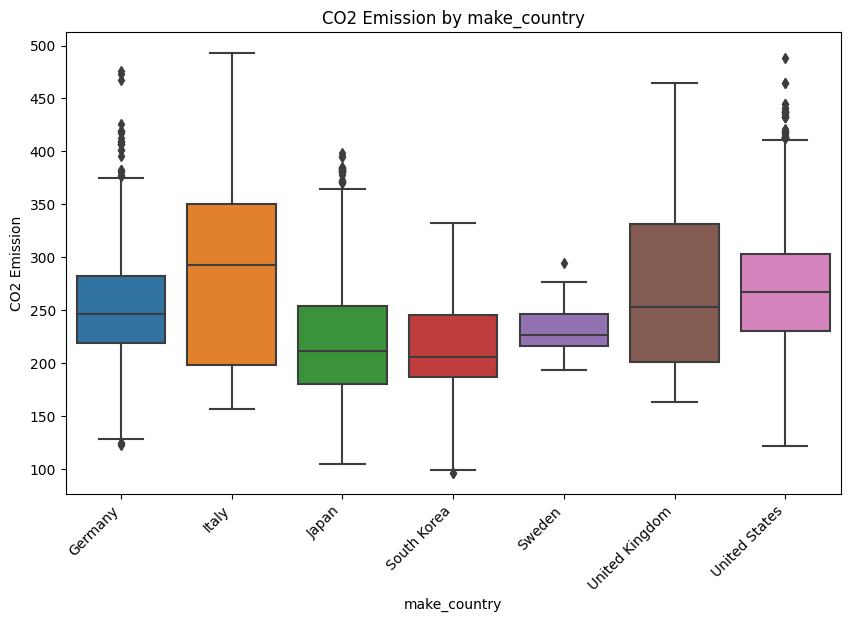

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='make_country', y='CO2 Emissions(g/km)', data=data)
plt.xlabel('make_country')
plt.ylabel('CO2 Emission')
plt.title('CO2 Emission by make_country')
plt.xticks(rotation=45, ha='right')
plt.show()

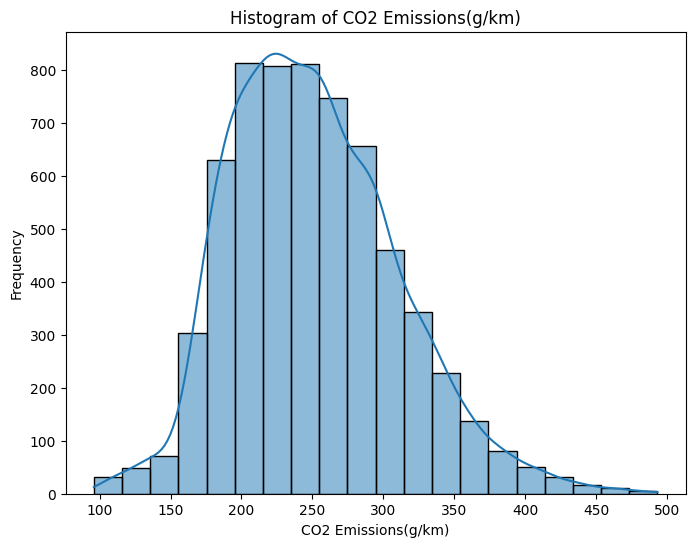

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(data['CO2 Emissions(g/km)'], bins=20, kde=True)  # Adjust the number of bins as needed
plt.xlabel('CO2 Emissions(g/km)')
plt.ylabel('Frequency')
plt.title('Histogram of CO2 Emissions(g/km)')
plt.show()

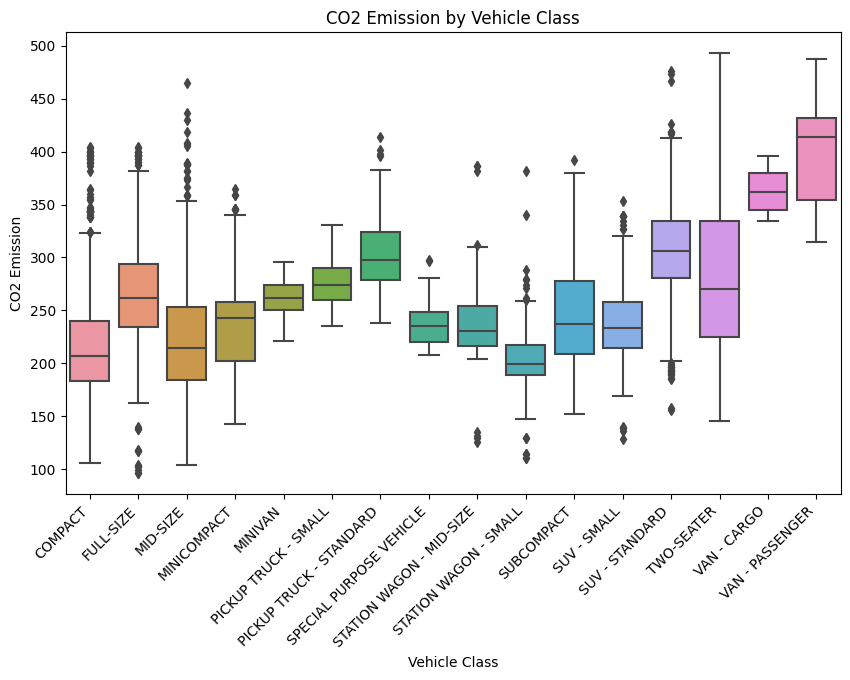

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Vehicle Class', y='CO2 Emissions(g/km)', data=data)
plt.xlabel('Vehicle Class')
plt.ylabel('CO2 Emission')
plt.title('CO2 Emission by Vehicle Class')
plt.xticks(rotation=45, ha='right')
plt.show()

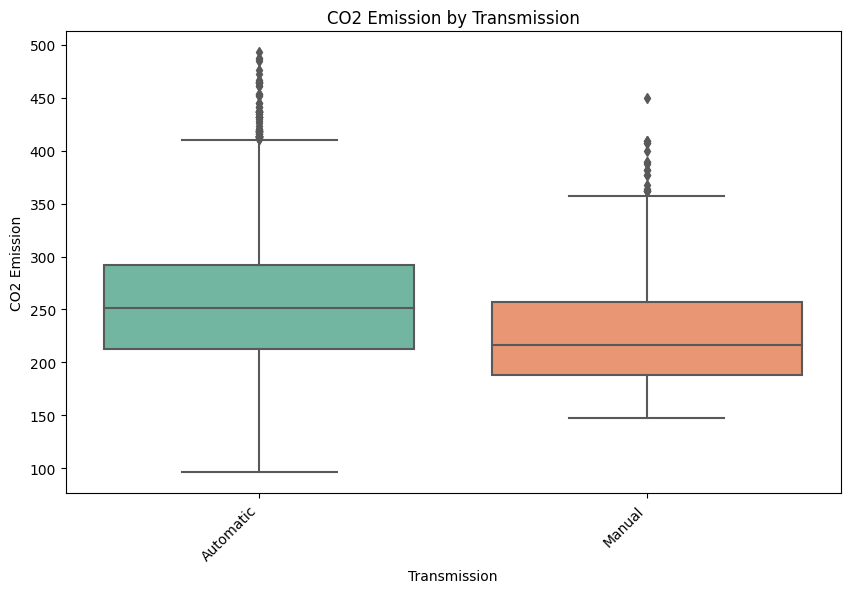

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='transmission_general', y='CO2 Emissions(g/km)', data=data, palette = "Set2")
plt.xlabel('Transmission')
plt.ylabel('CO2 Emission')
plt.title('CO2 Emission by Transmission')
plt.xticks(rotation=45, ha='right')
plt.show()

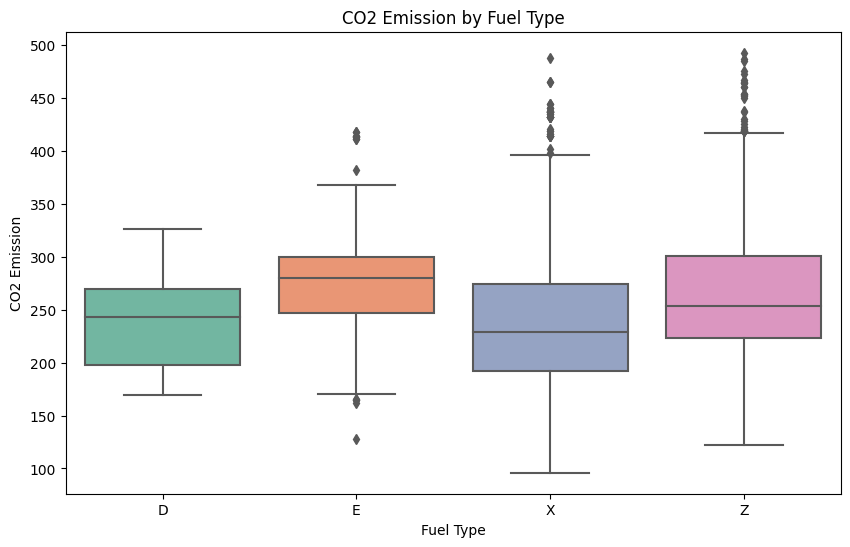

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel Type', y='CO2 Emissions(g/km)', data=data, palette = "Set2")
plt.xlabel('Fuel Type')
plt.ylabel('CO2 Emission')
plt.title('CO2 Emission by Fuel Type')
plt.show()

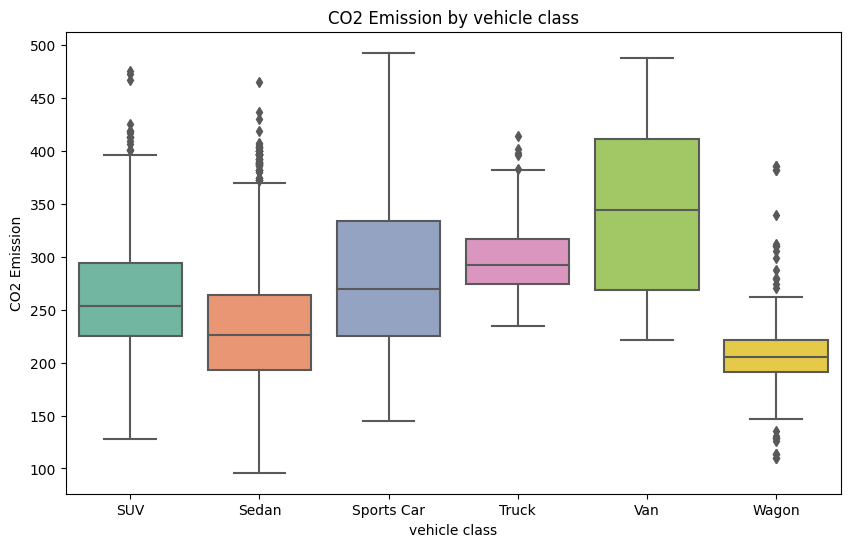

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='vehicle', y='CO2 Emissions(g/km)', data=data, palette = "Set2")
plt.xlabel('vehicle class')
plt.ylabel('CO2 Emission')
plt.title('CO2 Emission by vehicle class')
plt.show()

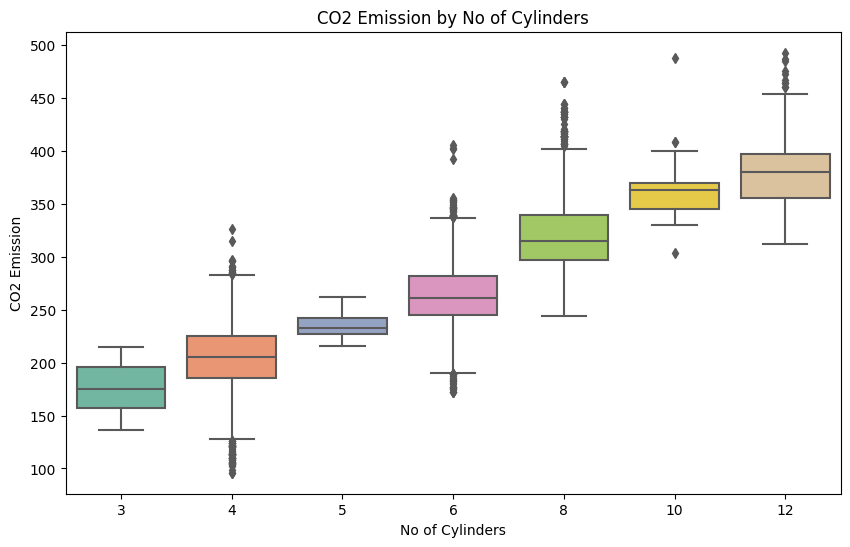

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cylinders', y='CO2 Emissions(g/km)', data=data, palette = "Set2")
plt.xlabel('No of Cylinders')
plt.ylabel('CO2 Emission')
plt.title('CO2 Emission by No of Cylinders')
plt.show()

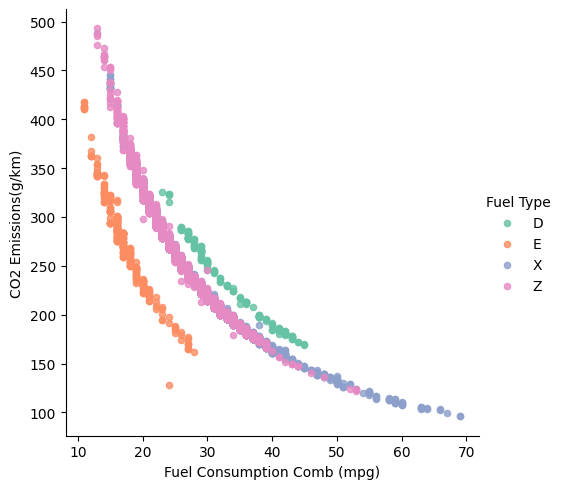

In [ ]:
marker_size = 20
sns.lmplot(x = 'Fuel Consumption Comb (mpg)', y = 'CO2 Emissions(g/km)', data= data,  hue='Fuel Type', fit_reg=False, scatter_kws={'s': marker_size}, palette='Set2')
plt.show()

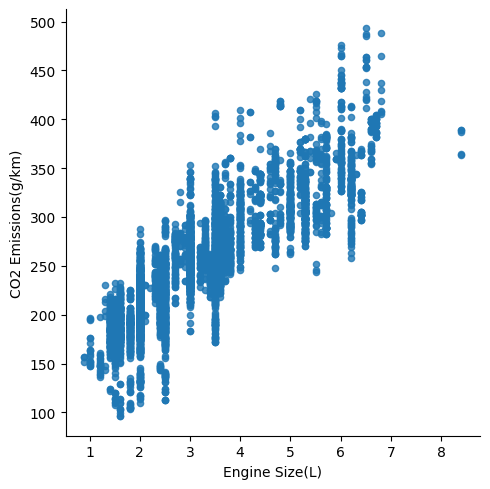

In [ ]:
sns.lmplot(x = 'Engine Size(L)', y = 'CO2 Emissions(g/km)', data= data, fit_reg=False, scatter_kws={'s': marker_size}, palette='Set2')
plt.show()

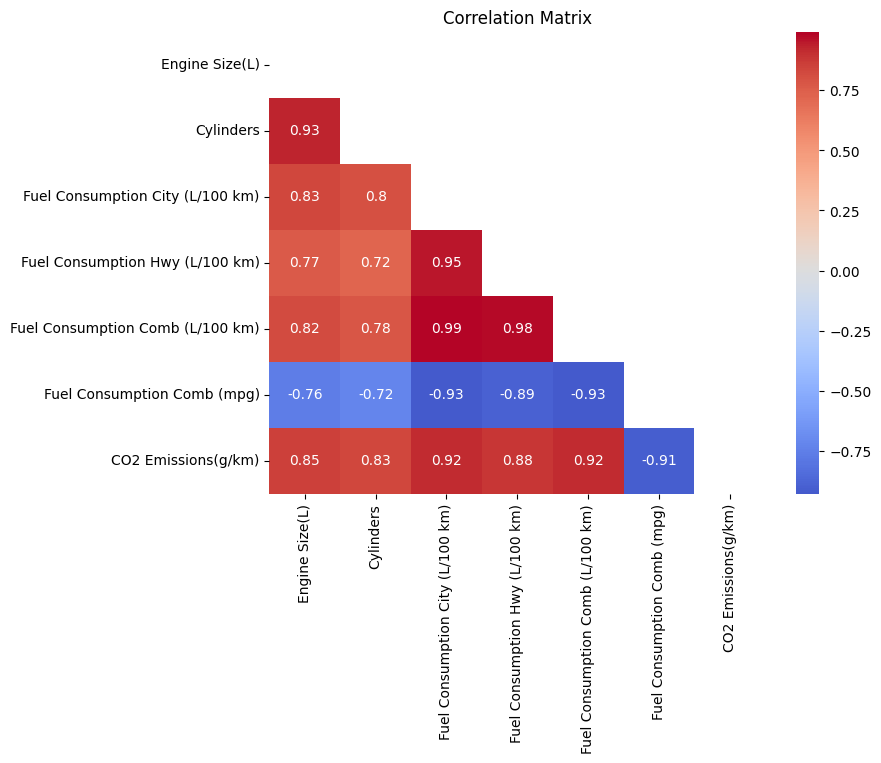

In [ ]:
correlation_matrix = data.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,mask=mask)
plt.title('Correlation Matrix')
plt.show()

# Model Fitting

In [ ]:
df_copy=data3.copy()

In [ ]:
# Scale the data set
#scaler = StandardScaler()
#df_scaled = scaler.fit_transform(df_copy)
#df_scaled = pd.DataFrame(df_scaled, columns=df_copy.columns)

# Split the dataset into predictors (X) and response (y)
X = df_copy.drop('CO2 Emissions(g/km)', axis=1)
y = df_copy['CO2 Emissions(g/km)']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb



models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=1.0),
    'Elastic-net':ElasticNet(alpha=1.0, l1_ratio=0.5),
    'GausianNB':GaussianNB(),
    'SVC': SVC(probability=True),
    'XG Boosting':xgb.XGBRegressor(n_estimators=100, random_state=42)
}


for name, model in models.items():
    model.fit(X_train, y_train)

    def calculate_mape(y_true, y_pred):
      return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    # Training set
    y_train_pred = model.predict(X_train)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    mape_train = calculate_mape(y_train, y_train_pred)

    # Test set
    y_test_pred = model.predict(X_test)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mape_test = calculate_mape(y_test, y_test_pred)



    print(name)
    print('='*len(name))
    print(f"Train Mean Squared Error: {train_mse}")
    print(f"Train R-squared: {train_r2}")
    print(f"Train RMSE: {rmse_train:.2f}")
    print(f"Train MAPE: {mape_train:.2f}%")



    print('\n')
    print(f"Test Mean Squared Error: {test_mse}")
    print(f"Test R-squared: {test_r2}")
    print(f"Test RMSE: {rmse_test:.2f}")
    print(f"Test MAPE: {mape_test:.2f}%")



    print('\n\n')

Linear Regression
Train Mean Squared Error: 24.7773558645338
Train R-squared: 0.9928602216536404
Train RMSE: 4.98
Train MAPE: 1.23%


Test Mean Squared Error: 27.978714562331547
Test R-squared: 0.9921910595501618
Test RMSE: 5.29
Test MAPE: 1.31%



Ridge
=====
Train Mean Squared Error: 24.888927994679094
Train R-squared: 0.9928280713191486
Train RMSE: 4.99
Train MAPE: 1.24%


Test Mean Squared Error: 27.69676315874997
Test R-squared: 0.9922697530053387
Test RMSE: 5.26
Test MAPE: 1.31%



Lasso
=====
Train Mean Squared Error: 87.3633474815215
Train R-squared: 0.9748256052815187
Train RMSE: 9.35
Train MAPE: 2.36%


Test Mean Squared Error: 86.97424956452855
Test R-squared: 0.975725234481174
Test RMSE: 9.33
Test MAPE: 2.43%



Elastic-net
Train Mean Squared Error: 314.0954273428629
Train R-squared: 0.9094910795528781
Train RMSE: 17.72
Train MAPE: 4.13%


Test Mean Squared Error: 338.8879419270808
Test R-squared: 0.9054153916978152
Test RMSE: 18.41
Test MAPE: 4.37%



GausianNB
Train Mean 

#### Random Forest

In [ ]:
# Fitting random forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on both training and testing sets
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Calculate MSE and R-squared for training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f"Train Mean Squared Error: {train_mse}")
print(f"Train R-squared: {train_r2}")

# Calculate MSE and R-squared for testing set
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test Mean Squared Error: {test_mse}")
print(f"Test R-squared: {test_r2}")


rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"\nTrain RMSE: {rmse_train:.2f}")
print(f"Test RMSE: {rmse_test:.2f}")


def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_train = calculate_mape(y_train, y_train_pred)
mape_test = calculate_mape(y_test, y_test_pred)

print(f"Train MAPE: {mape_train:.2f}%")
print(f"Test MAPE: {mape_test:.2f}%")


Train Mean Squared Error: 2.823605856150362
Train R-squared: 0.999186357089085
Test Mean Squared Error: 13.534559925903334
Test R-squared: 0.9962224650371022

Train RMSE: 1.68
Test RMSE: 3.68
Train MAPE: 0.40%
Test MAPE: 0.87%


### Random Forest with grid searchCV

In [ ]:
# Random forest with grid search
# Create a Random Forest Regressor instance
rf_model2 = RandomForestRegressor(random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model2, param_grid=param_grid,
                           cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the model with grid search
grid_search.fit(X_train, y_train)

# Get the best estimator from grid search
best_rf_model = grid_search.best_estimator_

# Make predictions using the best model
y_train_pred = best_rf_model.predict(X_train)
y_test_pred = best_rf_model.predict(X_test)

# Calculate MSE and R-squared for training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f"Train Mean Squared Error: {train_mse}")
print(f"Train R-squared: {train_r2}")

# Calculate MSE and R-squared for testing set
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test Mean Squared Error: {test_mse}")
print(f"Test R-squared: {test_r2}")

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"\nTrain RMSE: {rmse_train:.2f}")
print(f"Test RMSE: {rmse_test:.2f}")


def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_train = calculate_mape(y_train, y_train_pred)
mape_test = calculate_mape(y_test, y_test_pred)

print(f"Train MAPE: {mape_train:.2f}%")
print(f"Test MAPE: {mape_test:.2f}%")

Train Mean Squared Error: 14.186692209854277
Train R-squared: 0.9959119997145712
Test Mean Squared Error: 18.908580594411955
Test R-squared: 0.9947225602690296

Train RMSE: 3.77
Test RMSE: 4.35
Train MAPE: 1.11%
Test MAPE: 1.25%


### Gradient Boosting

In [ ]:
# Gradient Boosting
# Create a Gradient Boosting Regressor instance
gb_model = GradientBoostingRegressor(random_state=42)

# Fit the model
gb_model.fit(X_train, y_train)

# Make predictions on both training and testing sets
y_train_pred = gb_model.predict(X_train)
y_test_pred = gb_model.predict(X_test)

# Calculate MSE and R-squared for training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f"Train Mean Squared Error: {train_mse}")
print(f"Train R-squared: {train_r2}")

# Calculate MSE and R-squared for testing set
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test Mean Squared Error: {test_mse}")
print(f"Test R-squared: {test_r2}")


rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"\nTrain RMSE: {rmse_train:.2f}")
print(f"Test RMSE: {rmse_test:.2f}")


def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_train = calculate_mape(y_train, y_train_pred)
mape_test = calculate_mape(y_test, y_test_pred)

print(f"Train MAPE: {mape_train:.2f}%")
print(f"Test MAPE: {mape_test:.2f}%")

Train Mean Squared Error: 13.551404790815035
Train R-squared: 0.9960950624829703
Test Mean Squared Error: 17.17404009445588
Test R-squared: 0.9952066755575221

Train RMSE: 3.68
Test RMSE: 4.14
Train MAPE: 1.05%
Test MAPE: 1.15%


In [ ]:
get_unique_values(data3)

,Column Name,Number of Unique Values,Unique Values,Data Type
0,Engine Size(L),50,-,float64
1,Cylinders,7,"[4, 6, 12, 8, 10, 3, 5]",int64
2,Fuel Consumption City (L/100 km),210,-,float64
3,Fuel Consumption Hwy (L/100 km),143,-,float64
4,Fuel Consumption Comb (L/100 km),180,-,float64
5,Fuel Consumption Comb (mpg),54,-,int64
6,CO2 Emissions(g/km),330,-,int64
7,Fuel Type_E,2,"[0, 1]",uint8
8,Fuel Type_X,2,"[0, 1]",uint8
9,Fuel Type_Z,2,"[1, 0]",uint8


In [ ]:
#variable reduction

In [ ]:
data4 = data3.drop(['Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (L/100 km)','Fuel Consumption City (L/100 km)'], axis=1)
data4.head()

,Engine Size(L),Cylinders,Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Fuel Type_E,Fuel Type_X,Fuel Type_Z,make_country_Italy,make_country_Japan,make_country_South Korea,make_country_Sweden,make_country_United Kingdom,make_country_United States,transmission_general_Manual,vehicle_Sedan,vehicle_Sports Car,vehicle_Truck,vehicle_Van,vehicle_Wagon
0,2.0,4,33,196,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
1,2.4,4,29,221,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0
2,1.5,4,48,136,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
3,3.5,6,25,255,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
4,3.5,6,27,244,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_copy = data4.copy()

In [ ]:
# Scale the data set
#scaler = StandardScaler()
#df_scaled = scaler.fit_transform(df_copy)
#df_scaled = pd.DataFrame(df_scaled, columns=df_copy.columns)

# Split the dataset into predictors (X) and response (y)
X = df_copy.drop('CO2 Emissions(g/km)', axis=1)
y = df_copy['CO2 Emissions(g/km)']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb



models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=1.0),
    'Elastic-net':ElasticNet(alpha=1.0, l1_ratio=0.5),
    'GausianNB':GaussianNB(),
    'SVC': SVC(probability=True),
    'XG Boosting':xgb.XGBRegressor(n_estimators=100, random_state=42)
}


for name, model in models.items():
    model.fit(X_train, y_train)

    def calculate_mape(y_true, y_pred):
      return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    # Training set
    y_train_pred = model.predict(X_train)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    mape_train = calculate_mape(y_train, y_train_pred)

    # Test set
    y_test_pred = model.predict(X_test)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mape_test = calculate_mape(y_test, y_test_pred)



    print(name)
    print('='*len(name))
    print(f"Train Mean Squared Error: {train_mse}")
    print(f"Train R-squared: {train_r2}")
    print(f"Train RMSE: {rmse_train:.2f}")
    print(f"Train MAPE: {mape_train:.2f}%")



    print('\n')
    print(f"Test Mean Squared Error: {test_mse}")
    print(f"Test R-squared: {test_r2}")
    print(f"Test RMSE: {rmse_test:.2f}")
    print(f"Test MAPE: {mape_test:.2f}%")



    print('\n\n')

Linear Regression
Train Mean Squared Error: 210.8742020233651
Train R-squared: 0.9392350390556656
Train RMSE: 14.52
Train MAPE: 4.07%


Test Mean Squared Error: 209.1514023276861
Test R-squared: 0.9416252364940341
Test RMSE: 14.46
Test MAPE: 4.11%



Ridge
=====
Train Mean Squared Error: 210.909178828195
Train R-squared: 0.9392249602306645
Train RMSE: 14.52
Train MAPE: 4.07%


Test Mean Squared Error: 208.87194318795466
Test R-squared: 0.9417032343511359
Test RMSE: 14.45
Test MAPE: 4.12%



Lasso
=====
Train Mean Squared Error: 285.4913545392137
Train R-squared: 0.9177335546877456
Train RMSE: 16.90
Train MAPE: 4.51%


Test Mean Squared Error: 284.4023933761459
Test R-squared: 0.9206224664568479
Test RMSE: 16.86
Test MAPE: 4.62%



Elastic-net
Train Mean Squared Error: 360.5094067209422
Train R-squared: 0.8961165481160377
Train RMSE: 18.99
Train MAPE: 4.81%


Test Mean Squared Error: 380.1860208830056
Test R-squared: 0.893888977982808
Test RMSE: 19.50
Test MAPE: 5.06%



GausianNB
Train

In [ ]:
# Fitting random forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on both training and testing sets
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Calculate MSE and R-squared for training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f"Train Mean Squared Error: {train_mse}")
print(f"Train R-squared: {train_r2}")

# Calculate MSE and R-squared for testing set
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test Mean Squared Error: {test_mse}")
print(f"Test R-squared: {test_r2}")


rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"\nTrain RMSE: {rmse_train:.2f}")
print(f"Test RMSE: {rmse_test:.2f}")


def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_train = calculate_mape(y_train, y_train_pred)
mape_test = calculate_mape(y_test, y_test_pred)

print(f"Train MAPE: {mape_train:.2f}%")
print(f"Test MAPE: {mape_test:.2f}%")

Train Mean Squared Error: 10.971695803175816
Train R-squared: 0.996838424707356
Test Mean Squared Error: 19.607099989120915
Test R-squared: 0.9945276014783323

Train RMSE: 3.31
Test RMSE: 4.43
Train MAPE: 0.92%
Test MAPE: 1.25%


In [ ]:
# Random forest with grid search
# Create a Random Forest Regressor instance
rf_model2 = RandomForestRegressor(random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model2, param_grid=param_grid,
                           cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the model with grid search
grid_search.fit(X_train, y_train)

# Get the best estimator from grid search
best_rf_model = grid_search.best_estimator_

# Make predictions using the best model
y_train_pred = best_rf_model.predict(X_train)
y_test_pred = best_rf_model.predict(X_test)

# Calculate MSE and R-squared for training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f"Train Mean Squared Error: {train_mse}")
print(f"Train R-squared: {train_r2}")

# Calculate MSE and R-squared for testing set
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test Mean Squared Error: {test_mse}")
print(f"Test R-squared: {test_r2}")


rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"\nTrain RMSE: {rmse_train:.2f}")
print(f"Test RMSE: {rmse_test:.2f}")


def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_train = calculate_mape(y_train, y_train_pred)
mape_test = calculate_mape(y_test, y_test_pred)

print(f"Train MAPE: {mape_train:.2f}%")
print(f"Test MAPE: {mape_test:.2f}%")

Train Mean Squared Error: 13.194947197703074
Train R-squared: 0.9961977783747955
Test Mean Squared Error: 20.302122911511894
Test R-squared: 0.9943336185632082

Train RMSE: 3.63
Test RMSE: 4.51
Train MAPE: 1.05%
Test MAPE: 1.27%


In [ ]:
# Gradient Boosting
# Create a Gradient Boosting Regressor instance
gb_model = GradientBoostingRegressor(random_state=42)

# Fit the model
gb_model.fit(X_train, y_train)

# Make predictions on both training and testing sets
y_train_pred = gb_model.predict(X_train)
y_test_pred = gb_model.predict(X_test)

# Calculate MSE and R-squared for training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f"Train Mean Squared Error: {train_mse}")
print(f"Train R-squared: {train_r2}")

# Calculate MSE and R-squared for testing set
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test Mean Squared Error: {test_mse}")
print(f"Test R-squared: {test_r2}")


rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"\nTrain RMSE: {rmse_train:.2f}")
print(f"Test RMSE: {rmse_test:.2f}")


def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_train = calculate_mape(y_train, y_train_pred)
mape_test = calculate_mape(y_test, y_test_pred)

print(f"Train MAPE: {mape_train:.2f}%")
print(f"Test MAPE: {mape_test:.2f}%")


Train Mean Squared Error: 21.299690274926608
Train R-squared: 0.9938623367141945
Test Mean Squared Error: 26.725527291118954
Test R-squared: 0.9925408277552591

Train RMSE: 4.62
Test RMSE: 5.17
Train MAPE: 1.34%
Test MAPE: 1.45%


In [ ]:
get_unique_values(data4)

,Column Name,Number of Unique Values,Unique Values,Data Type
0,Engine Size(L),50,-,float64
1,Cylinders,7,"[4, 6, 12, 8, 10, 3, 5]",int64
2,Fuel Consumption Comb (mpg),54,-,int64
3,CO2 Emissions(g/km),330,-,int64
4,Fuel Type_E,2,"[0, 1]",uint8
5,Fuel Type_X,2,"[0, 1]",uint8
6,Fuel Type_Z,2,"[1, 0]",uint8
7,make_country_Italy,2,"[0, 1]",uint8
8,make_country_Japan,2,"[1, 0]",uint8
9,make_country_South Korea,2,"[0, 1]",uint8


In [ ]:
data5 = data4.drop(['make_country_Italy','make_country_Japan','make_country_South Korea','make_country_Sweden','make_country_United Kingdom','make_country_United States','transmission_general_Manual'],axis=1)
get_unique_values(data5)

,Column Name,Number of Unique Values,Unique Values,Data Type
0,Engine Size(L),50,-,float64
1,Cylinders,7,"[4, 6, 12, 8, 10, 3, 5]",int64
2,Fuel Consumption Comb (mpg),54,-,int64
3,CO2 Emissions(g/km),330,-,int64
4,Fuel Type_E,2,"[0, 1]",uint8
5,Fuel Type_X,2,"[0, 1]",uint8
6,Fuel Type_Z,2,"[1, 0]",uint8
7,vehicle_Sedan,2,"[1, 0]",uint8
8,vehicle_Sports Car,2,"[0, 1]",uint8
9,vehicle_Truck,2,"[0, 1]",uint8


In [ ]:
df_copy = data5.copy()

In [ ]:
# Scale the data set
#scaler = StandardScaler()
#df_scaled = scaler.fit_transform(df_copy)
#df_scaled = pd.DataFrame(df_scaled, columns=df_copy.columns)

# Split the dataset into predictors (X) and response (y)
X = df_copy.drop('CO2 Emissions(g/km)', axis=1)
y = df_copy['CO2 Emissions(g/km)']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb



models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=1.0),
    'Elastic-net':ElasticNet(alpha=1.0, l1_ratio=0.5),
    'GausianNB':GaussianNB(),
    'SVC': SVC(probability=True),
    'XG Boosting':xgb.XGBRegressor(n_estimators=100, random_state=42)
}


for name, model in models.items():
    model.fit(X_train, y_train)

    def calculate_mape(y_true, y_pred):
      return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    # Training set
    y_train_pred = model.predict(X_train)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    mape_train = calculate_mape(y_train, y_train_pred)

    # Test set
    y_test_pred = model.predict(X_test)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mape_test = calculate_mape(y_test, y_test_pred)



    print(name)
    print('='*len(name))
    print(f"Train Mean Squared Error: {train_mse}")
    print(f"Train R-squared: {train_r2}")
    print(f"Train RMSE: {rmse_train:.2f}")
    print(f"Train MAPE: {mape_train:.2f}%")



    print('\n')
    print(f"Test Mean Squared Error: {test_mse}")
    print(f"Test R-squared: {test_r2}")
    print(f"Test RMSE: {rmse_test:.2f}")
    print(f"Test MAPE: {mape_test:.2f}%")



    print('\n\n')

Linear Regression
Train Mean Squared Error: 223.74058516663084
Train R-squared: 0.9355274955928159
Train RMSE: 14.96
Train MAPE: 4.11%


Test Mean Squared Error: 219.42369021253634
Test R-squared: 0.9387582111273868
Test RMSE: 14.81
Test MAPE: 4.16%



Ridge
=====
Train Mean Squared Error: 223.7737565349296
Train R-squared: 0.9355179370177042
Train RMSE: 14.96
Train MAPE: 4.12%


Test Mean Squared Error: 219.10637164140635
Test R-squared: 0.9388467756616887
Test RMSE: 14.80
Test MAPE: 4.16%



Lasso
=====
Train Mean Squared Error: 285.4915407731324
Train R-squared: 0.9177335010230646
Train RMSE: 16.90
Train MAPE: 4.51%


Test Mean Squared Error: 284.40240483996064
Test R-squared: 0.9206224632572638
Test RMSE: 16.86
Test MAPE: 4.62%



Elastic-net
Train Mean Squared Error: 360.50936687220667
Train R-squared: 0.8961165595987456
Train RMSE: 18.99
Train MAPE: 4.81%


Test Mean Squared Error: 380.1859526172943
Test R-squared: 0.8938889970359661
Test RMSE: 19.50
Test MAPE: 5.06%



GausianNB

In [ ]:
# Fitting random forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on both training and testing sets
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Calculate MSE and R-squared for training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f"Train Mean Squared Error: {train_mse}")
print(f"Train R-squared: {train_r2}")

# Calculate MSE and R-squared for testing set
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test Mean Squared Error: {test_mse}")
print(f"Test R-squared: {test_r2}")

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"\nTrain RMSE: {rmse_train:.2f}")
print(f"Test RMSE: {rmse_test:.2f}")


def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_train = calculate_mape(y_train, y_train_pred)
mape_test = calculate_mape(y_test, y_test_pred)

print(f"Train MAPE: {mape_train:.2f}%")
print(f"Test MAPE: {mape_test:.2f}%")

Train Mean Squared Error: 12.408574292929819
Train R-squared: 0.9964243775433412
Test Mean Squared Error: 18.95796321765571
Test R-squared: 0.9947087774355364

Train RMSE: 3.52
Test RMSE: 4.35
Train MAPE: 1.02%
Test MAPE: 1.24%


In [ ]:
# Random forest with grid search
# Create a Random Forest Regressor instance
rf_model2 = RandomForestRegressor(random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model2, param_grid=param_grid,
                           cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the model with grid search
grid_search.fit(X_train, y_train)

# Get the best estimator from grid search
best_rf_model = grid_search.best_estimator_

# Make predictions using the best model
y_train_pred = best_rf_model.predict(X_train)
y_test_pred = best_rf_model.predict(X_test)

# Calculate MSE and R-squared for training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f"Train Mean Squared Error: {train_mse}")
print(f"Train R-squared: {train_r2}")

# Calculate MSE and R-squared for testing set
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test Mean Squared Error: {test_mse}")
print(f"Test R-squared: {test_r2}")

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"\nTrain RMSE: {rmse_train:.2f}")
print(f"Test RMSE: {rmse_test:.2f}")


def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_train = calculate_mape(y_train, y_train_pred)
mape_test = calculate_mape(y_test, y_test_pred)

print(f"Train MAPE: {mape_train:.2f}%")
print(f"Test MAPE: {mape_test:.2f}%")

Train Mean Squared Error: 14.186692209854277
Train R-squared: 0.9959119997145712
Test Mean Squared Error: 18.908580594411955
Test R-squared: 0.9947225602690296

Train RMSE: 3.77
Test RMSE: 4.35
Train MAPE: 1.11%
Test MAPE: 1.25%


In [ ]:
# Gradient Boosting
# Create a Gradient Boosting Regressor instance
gb_model = GradientBoostingRegressor(random_state=42)

# Fit the model
gb_model.fit(X_train, y_train)

# Make predictions on both training and testing sets
y_train_pred = gb_model.predict(X_train)
y_test_pred = gb_model.predict(X_test)

# Calculate MSE and R-squared for training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f"Train Mean Squared Error: {train_mse}")
print(f"Train R-squared: {train_r2}")

# Calculate MSE and R-squared for testing set
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test Mean Squared Error: {test_mse}")
print(f"Test R-squared: {test_r2}")


rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"\nTrain RMSE: {rmse_train:.2f}")
print(f"Test RMSE: {rmse_test:.2f}")


def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_train = calculate_mape(y_train, y_train_pred)
mape_test = calculate_mape(y_test, y_test_pred)

print(f"Train MAPE: {mape_train:.2f}%")
print(f"Test MAPE: {mape_test:.2f}%")

Train Mean Squared Error: 21.58937490010949
Train R-squared: 0.9937788619469328
Test Mean Squared Error: 25.593022448912098
Test R-squared: 0.9928569131441087

Train RMSE: 4.65
Test RMSE: 5.06
Train MAPE: 1.33%
Test MAPE: 1.43%


In [ ]:
data6 = data5.drop(['vehicle_Sedan','vehicle_Sports Car','vehicle_Truck','vehicle_Van','vehicle_Wagon'],axis=1)
get_unique_values(data6)

,Column Name,Number of Unique Values,Unique Values,Data Type
0,Engine Size(L),50,-,float64
1,Cylinders,7,"[4, 6, 12, 8, 10, 3, 5]",int64
2,Fuel Consumption Comb (mpg),54,-,int64
3,CO2 Emissions(g/km),330,-,int64
4,Fuel Type_E,2,"[0, 1]",uint8
5,Fuel Type_X,2,"[0, 1]",uint8
6,Fuel Type_Z,2,"[1, 0]",uint8


In [ ]:
df_copy = data6.copy()

In [ ]:
# Scale the data set
#scaler = StandardScaler()
#df_scaled = scaler.fit_transform(df_copy)
#df_scaled = pd.DataFrame(df_scaled, columns=df_copy.columns)

# Split the dataset into predictors (X) and response (y)
X = df_copy.drop('CO2 Emissions(g/km)', axis=1)
y = df_copy['CO2 Emissions(g/km)']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb



models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=1.0),
    'Elastic-net':ElasticNet(alpha=1.0, l1_ratio=0.5),
    'GausianNB':GaussianNB(),
    'SVC': SVC(probability=True),
    'XG Boosting':xgb.XGBRegressor(n_estimators=100, random_state=42)
}


for name, model in models.items():
    model.fit(X_train, y_train)

    def calculate_mape(y_true, y_pred):
      return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    # Training set
    y_train_pred = model.predict(X_train)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    mape_train = calculate_mape(y_train, y_train_pred)

    # Test set
    y_test_pred = model.predict(X_test)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mape_test = calculate_mape(y_test, y_test_pred)



    print(name)
    print('='*len(name))
    print(f"Train Mean Squared Error: {train_mse}")
    print(f"Train R-squared: {train_r2}")
    print(f"Train RMSE: {rmse_train:.2f}")
    print(f"Train MAPE: {mape_train:.2f}%")



    print('\n')
    print(f"Test Mean Squared Error: {test_mse}")
    print(f"Test R-squared: {test_r2}")
    print(f"Test RMSE: {rmse_test:.2f}")
    print(f"Test MAPE: {mape_test:.2f}%")



    print('\n\n')

Linear Regression
Train Mean Squared Error: 253.38217206948255
Train R-squared: 0.9269860530967807
Train RMSE: 15.92
Train MAPE: 4.30%


Test Mean Squared Error: 252.53054028874956
Test R-squared: 0.929517993169878
Test RMSE: 15.89
Test MAPE: 4.39%



Ridge
=====
Train Mean Squared Error: 253.4170175080364
Train R-squared: 0.9269760121259436
Train RMSE: 15.92
Train MAPE: 4.30%


Test Mean Squared Error: 252.34853678474377
Test R-squared: 0.9295687908761585
Test RMSE: 15.89
Test MAPE: 4.39%



Lasso
=====
Train Mean Squared Error: 295.74548150926387
Train R-squared: 0.9147787521615254
Train RMSE: 17.20
Train MAPE: 4.59%


Test Mean Squared Error: 299.7439465873408
Test R-squared: 0.9163405944227575
Test RMSE: 17.31
Test MAPE: 4.76%



Elastic-net
Train Mean Squared Error: 365.80468801494214
Train R-squared: 0.894590673647128
Train RMSE: 19.13
Train MAPE: 4.86%


Test Mean Squared Error: 387.4468602738987
Test R-squared: 0.8918624566323361
Test RMSE: 19.68
Test MAPE: 5.13%



GausianNB
T

In [ ]:
# Fitting random forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on both training and testing sets
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Calculate MSE and R-squared for training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f"Train Mean Squared Error: {train_mse}")
print(f"Train R-squared: {train_r2}")

# Calculate MSE and R-squared for testing set
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test Mean Squared Error: {test_mse}")
print(f"Test R-squared: {test_r2}")

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"\nTrain RMSE: {rmse_train:.2f}")
print(f"Test RMSE: {rmse_test:.2f}")


def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_train = calculate_mape(y_train, y_train_pred)
mape_test = calculate_mape(y_test, y_test_pred)

print(f"Train MAPE: {mape_train:.2f}%")
print(f"Test MAPE: {mape_test:.2f}%")

Train Mean Squared Error: 13.908335479565688
Train R-squared: 0.9959922102651377
Test Mean Squared Error: 18.592627418615745
Test R-squared: 0.9948107437175306

Train RMSE: 3.73
Test RMSE: 4.31
Train MAPE: 1.09%
Test MAPE: 1.24%


In [ ]:
# Random forest with grid search
# Create a Random Forest Regressor instance
rf_model2 = RandomForestRegressor(random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model2, param_grid=param_grid,
                           cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the model with grid search
grid_search.fit(X_train, y_train)

# Get the best estimator from grid search
best_rf_model = grid_search.best_estimator_

# Make predictions using the best model
y_train_pred = best_rf_model.predict(X_train)
y_test_pred = best_rf_model.predict(X_test)

# Calculate MSE and R-squared for training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f"Train Mean Squared Error: {train_mse}")
print(f"Train R-squared: {train_r2}")

# Calculate MSE and R-squared for testing set
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test Mean Squared Error: {test_mse}")
print(f"Test R-squared: {test_r2}")

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"\nTrain RMSE: {rmse_train:.2f}")
print(f"Test RMSE: {rmse_test:.2f}")


def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_train = calculate_mape(y_train, y_train_pred)
mape_test = calculate_mape(y_test, y_test_pred)

print(f"Train MAPE: {mape_train:.2f}%")
print(f"Test MAPE: {mape_test:.2f}%")

Train Mean Squared Error: 14.186692209854277
Train R-squared: 0.9959119997145712
Test Mean Squared Error: 18.908580594411955
Test R-squared: 0.9947225602690296

Train RMSE: 3.77
Test RMSE: 4.35
Train MAPE: 1.11%
Test MAPE: 1.25%


In [ ]:
# Gradient Boosting
# Create a Gradient Boosting Regressor instance
gb_model = GradientBoostingRegressor(random_state=42)

# Fit the model
gb_model.fit(X_train, y_train)

# Make predictions on both training and testing sets
y_train_pred = gb_model.predict(X_train)
y_test_pred = gb_model.predict(X_test)

# Calculate MSE and R-squared for training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f"Train Mean Squared Error: {train_mse}")
print(f"Train R-squared: {train_r2}")

# Calculate MSE and R-squared for testing set
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test Mean Squared Error: {test_mse}")
print(f"Test R-squared: {test_r2}")


rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"\nTrain RMSE: {rmse_train:.2f}")
print(f"Test RMSE: {rmse_test:.2f}")


def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_train = calculate_mape(y_train, y_train_pred)
mape_test = calculate_mape(y_test, y_test_pred)

print(f"Train MAPE: {mape_train:.2f}%")
print(f"Test MAPE: {mape_test:.2f}%")

Train Mean Squared Error: 21.11757416040471
Train R-squared: 0.9939148148195297
Test Mean Squared Error: 26.71605085896436
Test R-squared: 0.9925434726549813

Train RMSE: 4.60
Test RMSE: 5.17
Train MAPE: 1.33%
Test MAPE: 1.43%
